In [2]:
import numpy as np
import pandas as pd
import csv
import scipy.io
import os
import matplotlib.pyplot as plt
from scipy import signal

In [9]:


def sample_preprocessing(data):
    # TODO: Do some fancy pre-process
    # Write your code here
    """
    pre-process your data
    :param data:
    :return: dataf
    """
    b, a = signal.butter(2, [49,51], 'bandstop',fs=300)  #Electricity signal remove filter
    dataFelectric = signal.filtfilt(b,a,data) 
    b, a = signal.butter(2, 5, 'lowpass',fs=300) #Baseband signal pass filter
    dataLowFre = signal.filtfilt(b,a,dataFelectric)
    dataf = dataFelectric-dataLowFre #Remove base signal 
 
    return dataf

In [10]:
# Prepare data for training
# Read csv file to record file list
csv_reader = csv.reader(open("./data/train_data.csv")) 
# Set training data directory
train_dir = './data/train/'
train_without_preprocess_dir = './data_without_preprocess/'
if not os.path.exists(train_dir):
    os.makedirs(train_dir)
if not os.path.exists(train_without_preprocess_dir):
    os.makedirs(train_without_preprocess_dir)

N = 0
breakN = 2
# Read csv file by rows
for row in csv_reader:
    filename = row[0]
    label_name = row[1]
    N += 1
    # if N > breakN:
    #     break
    # Convert label from str to int
    if label_name == 'N':
        label = 1
    elif label_name == 'A':
        label = 0
    else:
        print('Unrecognizable label')
        continue
    # Read original data
    # record = './ori_data/training2017/' + filename
    record = '../training2017/' + filename
    # Read waveform samples (input is in WFDB-MAT format)
    mat_data = scipy.io.loadmat(record + ".mat")
    samples = mat_data['val']
    samples = samples[0, :]
    # preprocessing
    # TODO: Use given function to preprocess data 
    new_samples = sample_preprocessing(samples)
    # Save data
    save_filename = os.path.join(train_dir, filename + '.mat')
    scipy.io.savemat(save_filename, {'value': new_samples, 'label': label})
    save_filename = os.path.join(train_without_preprocess_dir, filename + '.mat')
    scipy.io.savemat(save_filename, {'value': samples, 'label': label})


In [5]:
# Prepare data for testing
csv_reader = csv.reader(open("./data/test_data.csv")) # Read csv file to record file list
test_dir = './data/test/'
test_without_preprocess_dir = './data_without_preprocess/'
if not os.path.exists(test_dir):
    os.makedirs(test_dir)
if not os.path.exists(test_without_preprocess_dir):
    os.makedirs(test_without_preprocess_dir)
N = 0
for row in csv_reader:
    filename = row[0]
    label_name = row[1]
    N += 1
    # if N > breakN:
    #     break

    if label_name == 'N':
        label = 1
    elif label_name == 'A':
        label = 0
    else:
        print('Unrecognizable label ', label_name)
        continue
    record = '../training2017/' + filename
    # Read waveform samples (input is in WFDB-MAT format)
    mat_data = scipy.io.loadmat(record + ".mat")
    samples = mat_data['val']
    samples = samples[0, :]
    # plt.plot(samples)
    # plt.show()
    # preprocessing
    # TODO: Use given function to preprocess data 
    new_samples = sample_preprocessing(samples)
    # Save data
    save_filename = os.path.join(test_dir, filename + '.mat')
    scipy.io.savemat(save_filename, {'value': new_samples, 'label': label})
    save_filename = os.path.join(test_without_preprocess_dir, filename + '.mat')
    scipy.io.savemat(save_filename, {'value': samples, 'label': label})


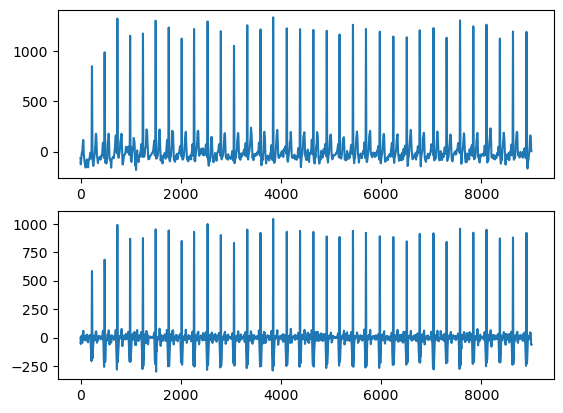

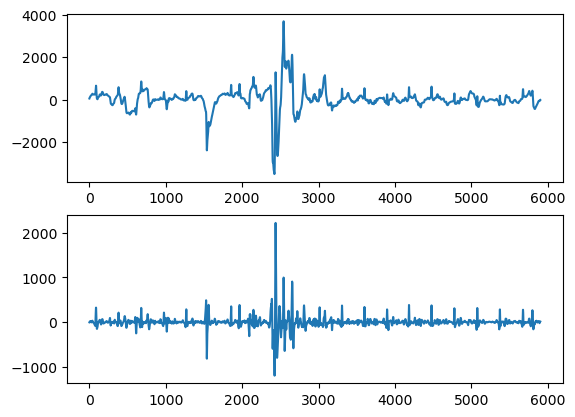

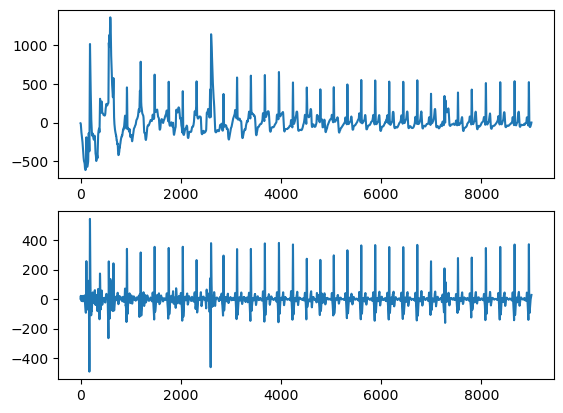

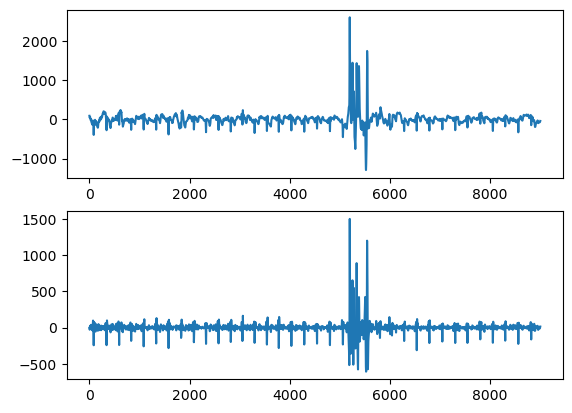

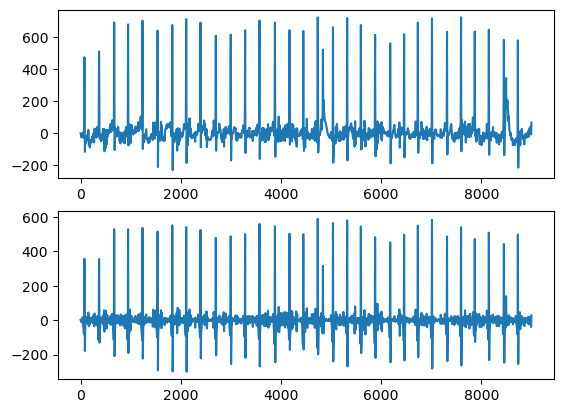

In [8]:
def demo_preprocessing(data):
    b, a = signal.butter(2, [49,51], 'bandstop',fs=300)  #Electricity signal remove filter
    dataFelectric = signal.filtfilt(b,a,data) 
    b, a = signal.butter(2, 5, 'lowpass',fs=300) #Baseband signal pass filter
    dataLowFre = signal.filtfilt(b,a,dataFelectric)
    dataf = dataFelectric-dataLowFre #Remove base signal 
 
    return dataf

# plt.plot(samples)
# plt.show()
sampleLenVec = []
N = 0
for row in csv_reader:
    filename = row[0]
    label_name = row[1]
    N += 1
    if N > 5:
        break

    if label_name == 'N':
        label = 1
    elif label_name == 'A':
        label = 0
    else:
        print('Unrecognizable label ', label_name)
        continue
    record = '../training2017/' + filename
    # Read waveform samples (input is in WFDB-MAT format)
    mat_data = scipy.io.loadmat(record + ".mat")
    temp = mat_data['val']
    samples = temp[0, :]
    sampleLenVec.append(len(samples))
    samplesNew = demo_preprocessing(samples)
    # plt.subplot(211)
    # plt.plot(samples)
    # plt.subplot(212)
    # plt.plot(samplesNew)
    # plt.show()

    # print(N)
# print(min(sampleLenVec))
# print(max(sampleLenVec))

# data = sampleLenVec
# print(data)
# plt.hist(data,rwidth=0.5)
# plt.show()